In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go


import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot

import folium

In [5]:
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [190]:
data = pd.read_excel(r"data\Covid cases in India.xlsx")

In [191]:
data

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [192]:
#by defaul it looks to drop row, that's why we need to specify the axis = 1
data.drop(['S. No.'], axis = 1, inplace = True)

In [193]:
#creating a new column with total number of cases
data['Total Cases'] = data['Total Confirmed cases (Indian National)'] + data['Total Confirmed cases ( Foreign National )']
data

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [194]:
overall_cases = data['Total Cases'].sum()
print("Total number of cases in India till 27 March-   ",overall_cases)

Total number of cases in India till 27 March-    729


In [197]:
data["Active Cases"] = data['Total Cases'] - data['Cured']
data

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,33
3,Gujarat,43,0,0,3,43,43
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,4
6,Karnataka,20,0,3,2,20,17
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,23
9,Maharashtra,144,3,15,4,147,132


### Heatmap in dataframes

Highlighting the bigger numbers to get a better understanding at first glance 

In [198]:
data.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,33
3,Gujarat,43,0,0,3,43,43
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,4
6,Karnataka,20,0,3,2,20,17
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,23
9,Maharashtra,144,3,15,4,147,132


In [200]:
Total_Active_Cases = data.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending = False).to_frame()
Total_Active_Cases.style.background_gradient(cmap='Blues')

,Active Cases
Name of State / UT,
Maharashtra,132
Kerala,127
Telengana,44
Gujarat,43
Rajasthan,40
Tamil Nadu,34
Delhi,33
Uttar Pradesh,32
Punjab,29


## Visualizations

#### Plotting using pandas 

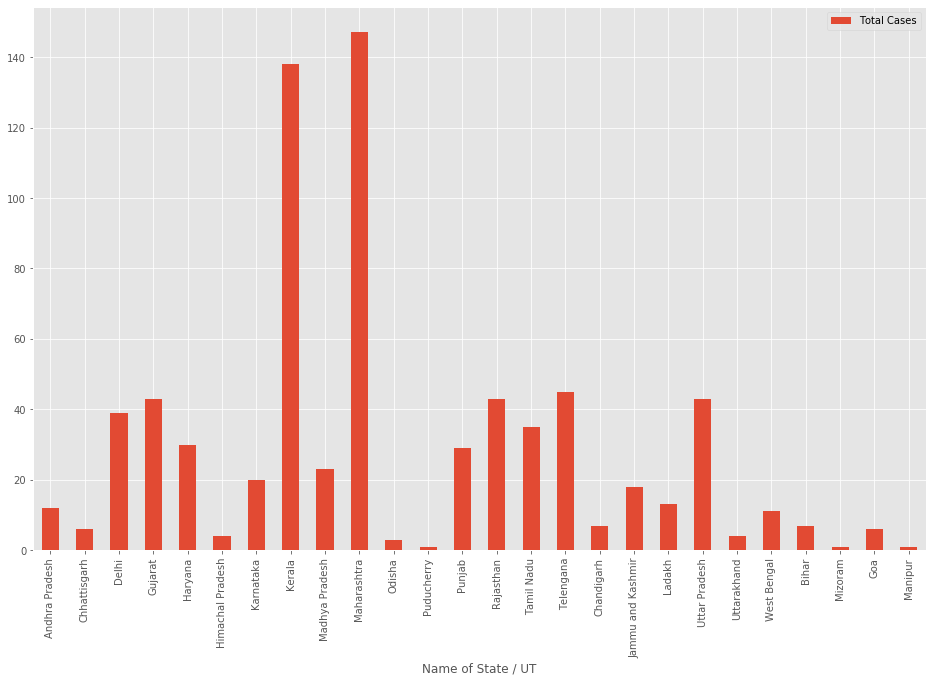

In [201]:
#Definig the size of the plots to make them bigger, pandas uses matplotlib in the backend so we're using plt.rcParams...
plt.rcParams['figure.figsize'] = 16, 10


data.plot(kind = 'bar', x = 'Name of State / UT', y = "Total Cases")

In [203]:
# data.plot(kind = 'scatter', x = 'Name of State / UT', y = 'Total Cases')
# ValueError: scatter requires x column to be numeric

#### Plotting using matplotlib

<BarContainer object of 26 artists>

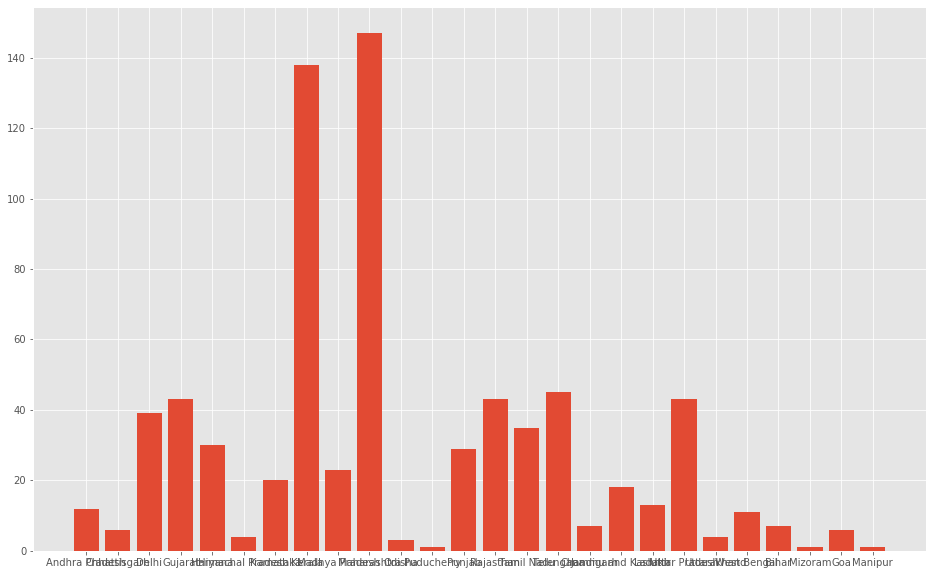

In [204]:
plt.bar(data['Name of State / UT'], data["Total Cases"])

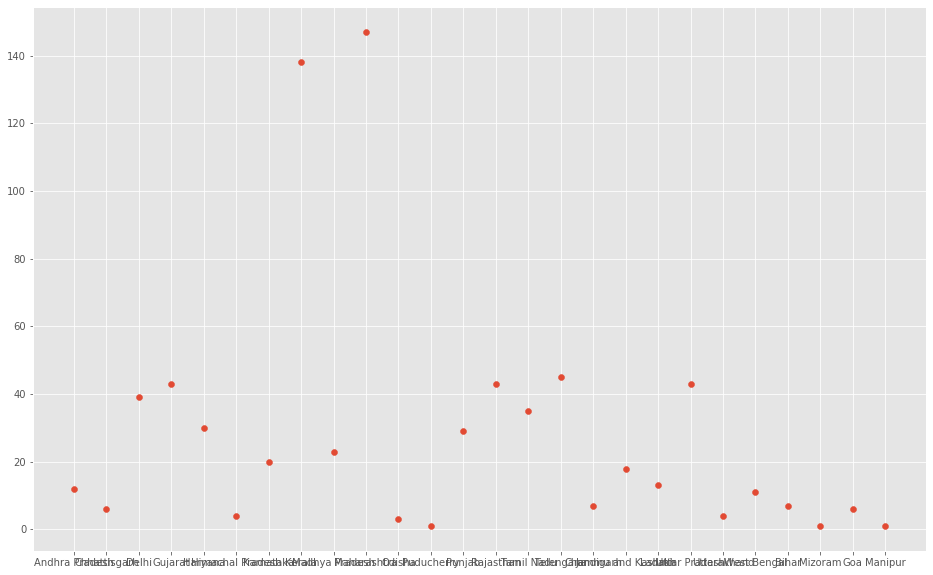

In [205]:
plt.scatter(data['Name of State / UT'], data["Total Cases"])

#### Plotting usnig plotly

In [206]:
data.iplot(kind = 'bar', x = 'Name of State / UT', y = "Total Cases")

In [207]:
data.iplot(kind = 'scatter', x = 'Name of State / UT', y = "Total Cases", mode = 'markers+lines', colors = 'red')

#### Plotting using  plotly express

In [208]:
px.bar(data, x = 'Name of State / UT', y = "Total Cases")

In [209]:
px.scatter(data, x = 'Name of State / UT', y = "Total Cases")

### Creating plot objects

Using plot objects in matplotlib and plotly gives you more specific control over individual visualiztions

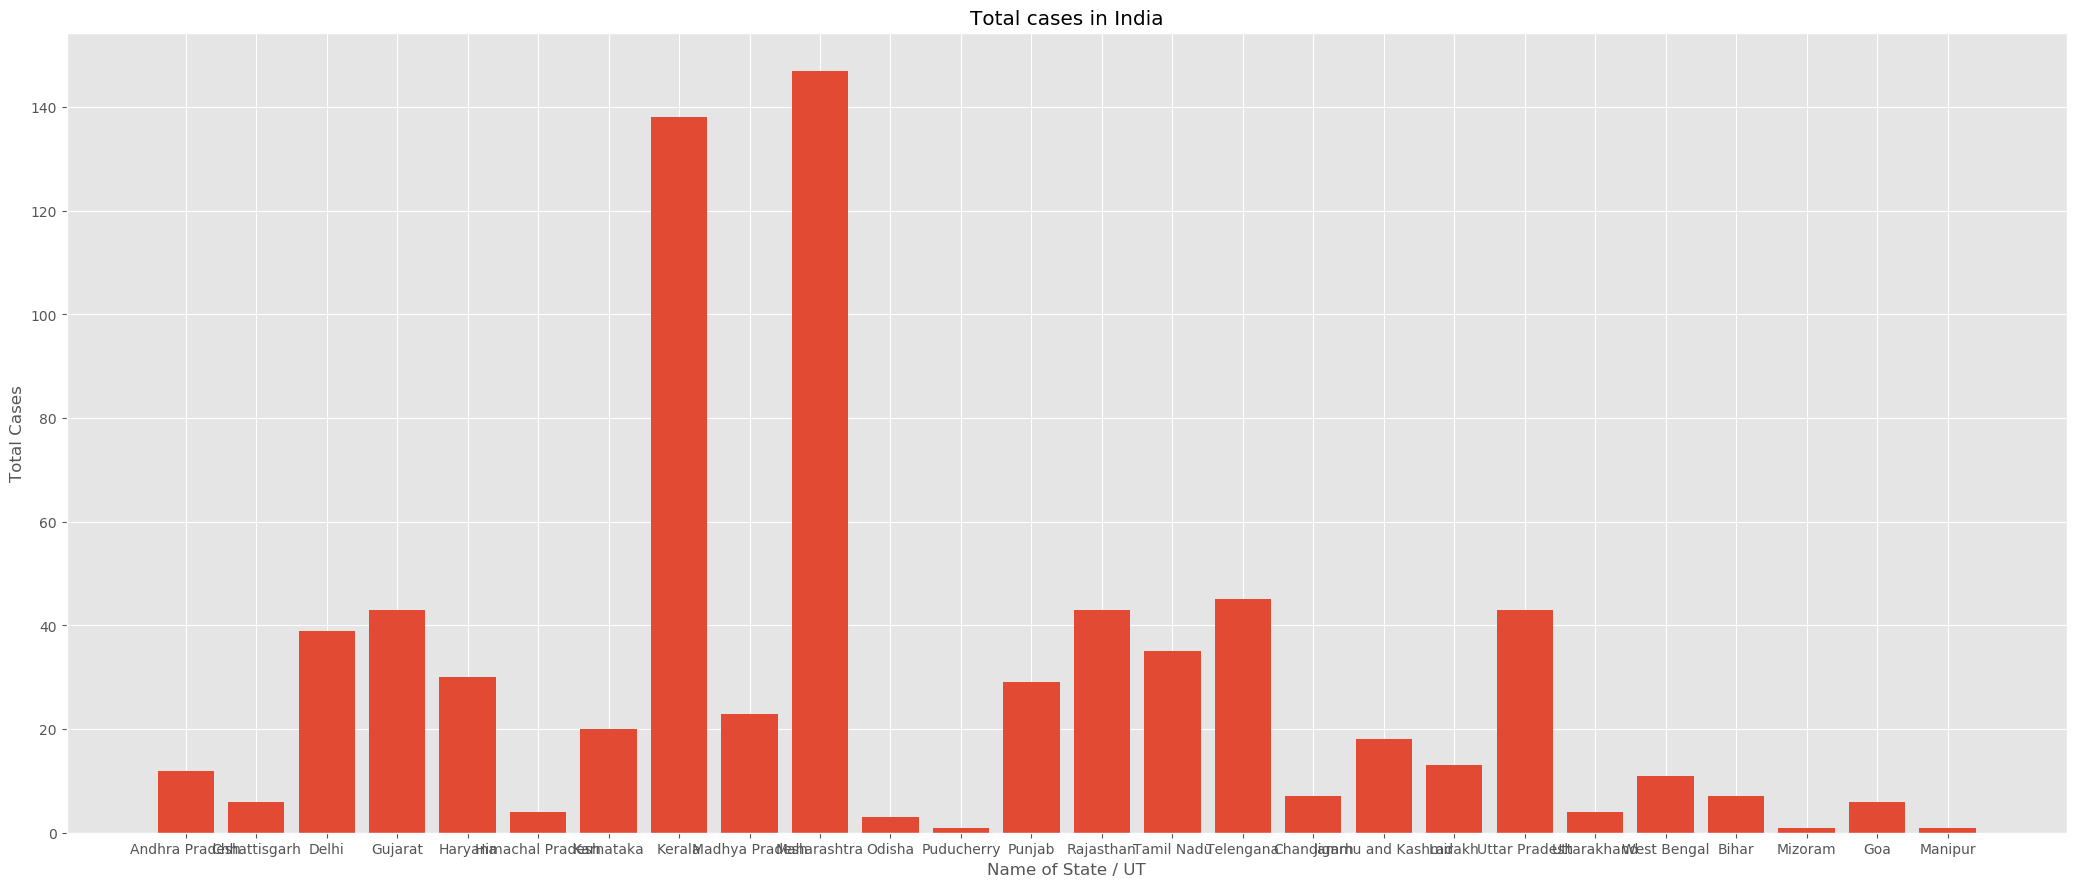

In [210]:
# matplotlib
fig = plt.figure(figsize=[20,8], dpi = 100)

axes = fig.add_axes([0,0,1,1])
axes.bar(data['Name of State / UT'], data["Total Cases"])
axes.set_title("Total cases in India")
axes.set_xlabel('Name of State / UT')
axes.set_ylabel("Total Cases")
plt.show()

In [68]:
# plotly

fig = go.Figure()
fig.add_trace(go.Bar(x = data['Name of State / UT'], y = data["Total Cases"]))
fig.update_layout(title = "Total cases in India", xaxis = dict(title = "Name of State / UT"), yaxis = dict(title = "Total Cases"))

## Map visualization 

In [212]:
Indian_coord = pd.read_excel(r"data\Indian Coordinates.xlsx")
Indian_coord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [213]:
data_with_coord = pd.merge(Indian_coord,data, on = "Name of State / UT" )
data_with_coord

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,33
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,17
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,132
6,Punjab,31.519974,75.980003,29,0,0,1,29,29
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,34


In [214]:
# Coordinates of India, approximately. To center the map at initially.
coords = [20, 70]

map = folium.Map(location = coords, zoom_start = 4, tiles = 'Stamenterrain')

for lat,long, val, name in zip(data_with_coord['Latitude'], data_with_coord['Longitude'], data_with_coord['Total Cases'], data_with_coord['Name of State / UT']):
    folium.CircleMarker([lat,long], radius= .5 * val, popup = ('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong> Total Cases </strong>: '+str(val)+'<br>'),color = 'red', fill_color ='red',fill_opacity = .3).add_to(map)

In [227]:
map